<a href="https://colab.research.google.com/github/ahsanGoheer/Advanced-Python-Workshop-AI/blob/main/MNIST_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Necessary Modules.

!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Modules

import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
# Load the Mnist Dataset
 

# Prepare a tensor transformation for the images.
image_tensor_trfm = transforms.ToTensor()

# Download the MNIST Dataset.
mnist_dataset = datasets.MNIST(root = "./data",
                               train = True,
                               transform = image_tensor_trfm,
                               download = True)
# Create a Data Loader.
data_loader = torch.utils.data.DataLoader(dataset = mnist_dataset,
                                          batch_size = 32,
                                          shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 282225119.43it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 120893906.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 152921866.15it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 23204054.53it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
class AutoEncoder(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = torch.nn.Sequential(torch.nn.Linear(28 * 28, 128),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(128, 64),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(64, 32),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(32, 16),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(16, 8)
                                       )
    self.decoder = torch.nn.Sequential(torch.nn.Linear(8, 16),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(16, 32),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(32, 64),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(64, 128),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(128, 28 * 28)
                                       )
    
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded




In [16]:
auto_encoder_model = AutoEncoder()
auto_encoder_model.cuda()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [17]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(auto_encoder_model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8
                             )

In [18]:
import numpy as np

In [22]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    print(f"Epoch:{epoch}")
    counter = 1
    for (image, _) in data_loader:
      
      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28).cuda()
       
      # Output of Autoencoder
      reconstructed = auto_encoder_model(image)
       
      # Calculating the loss function
      loss = loss_func(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(f"Image:{counter} Loss:{loss}")
      counter+=1
      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, image, reconstructed))
 

Epoch:0
Image:1 Loss:0.06889767199754715
Image:2 Loss:0.07444838434457779
Image:3 Loss:0.06300678104162216
Image:4 Loss:0.0651049017906189
Image:5 Loss:0.061039503663778305
Image:6 Loss:0.06955214589834213
Image:7 Loss:0.06824430823326111
Image:8 Loss:0.06615887582302094
Image:9 Loss:0.07767949998378754
Image:10 Loss:0.0712776854634285
Image:11 Loss:0.07348691672086716
Image:12 Loss:0.0644756630063057
Image:13 Loss:0.07227558642625809
Image:14 Loss:0.06776399165391922
Image:15 Loss:0.07023893296718597
Image:16 Loss:0.06619398295879364
Image:17 Loss:0.06884067505598068
Image:18 Loss:0.07003781944513321
Image:19 Loss:0.07075932621955872
Image:20 Loss:0.07089804112911224
Image:21 Loss:0.06581181287765503
Image:22 Loss:0.06670759618282318
Image:23 Loss:0.07401058822870255
Image:24 Loss:0.06655114889144897
Image:25 Loss:0.06861531734466553
Image:26 Loss:0.07156793028116226
Image:27 Loss:0.07018686830997467
Image:28 Loss:0.0735911950469017
Image:29 Loss:0.07110092788934708
Image:30 Loss:0.06

KeyboardInterrupt: ignored

AttributeError: ignored

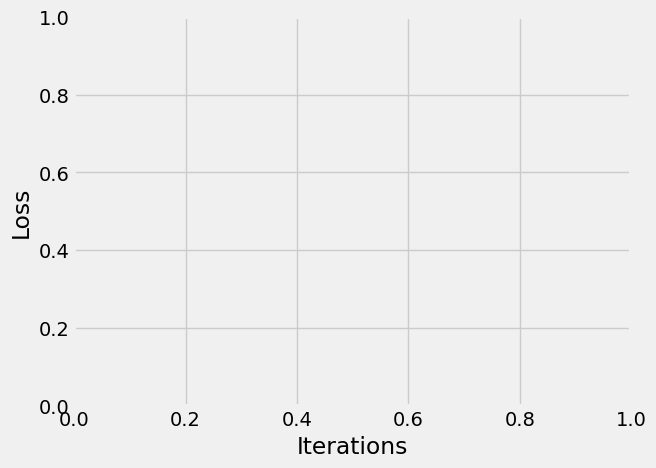

In [23]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:].cuda())

In [ ]:
for i, item in enumerate(image):
   
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
 
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])